# 1. Configuración Inicial


In [ ]:
!pip install tensorflow keras numpy matplotlib


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt


# 2. Carga de Imágenes


In [ ]:
# Cargar el dataset CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Ver las formas de los datos
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step
Shape of X_train: (50000, 32, 32, 3)
Shape of X_test: (10000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of y_test: (10000, 1)


# 3. Visualización de Imágenes


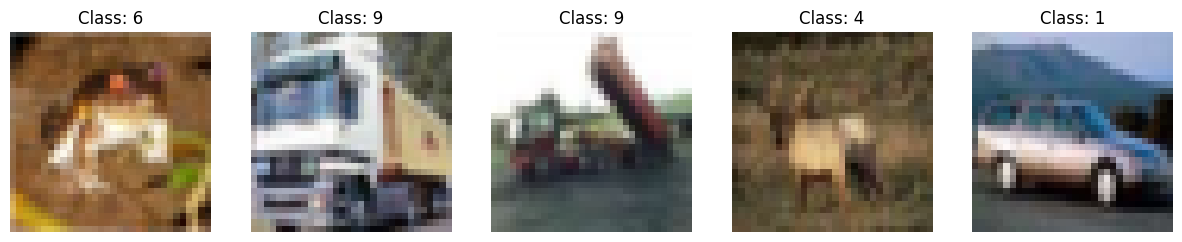

In [ ]:
# Muestra algunas imágenes de ejemplo del dataset de entrenamiento
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(X_train[i])
    axes[i].set_title(f"Class: {y_train[i][0]}")
    axes[i].axis('off')
plt.show()


# 4. Redimensionamiento y Normalización de Imágenes

In [ ]:
# Normalizar las imágenes: convertir valores de píxeles entre 0 y 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Verificamos que los valores estén normalizados
print(f"Valor máximo en X_train después de normalización: {X_train.max()}")
print(f"Valor mínimo en X_train después de normalización: {X_train.min()}")


Valor máximo en X_train después de normalización: 1.0
Valor mínimo en X_train después de normalización: 0.0


In [ ]:
from tensorflow.keras.utils import to_categorical

# Convertir las etiquetas a formato one-hot encoded
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Verificar la conversión
print(f"Forma de y_train después de one-hot encoding: {y_train.shape}")
print(f"Ejemplo de etiqueta one-hot encoded: {y_train[0]}")


Forma de y_train después de one-hot encoding: (50000, 10)
Ejemplo de etiqueta one-hot encoded: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


# 5. Augmentacion de Datos

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Crear un generador de augmentación de datos con transformaciones
datagen = ImageDataGenerator(
    rotation_range=15,            # Rotar las imágenes hasta 15 grados
    width_shift_range=0.1,        # Desplazar horizontalmente las imágenes hasta un 10%
    height_shift_range=0.1,       # Desplazar verticalmente las imágenes hasta un 10%
    horizontal_flip=True,         # Voltear las imágenes horizontalmente
    zoom_range=0.1,               # Aplicar zoom a las imágenes hasta un 10%
    shear_range=0.1,              # Aplicar un cizallamiento hasta un 10%
    fill_mode='nearest'           # Rellenar los bordes con los píxeles más cercanos
)

# Ajustar el generador de datos a los datos de entrenamiento
datagen.fit(X_train)


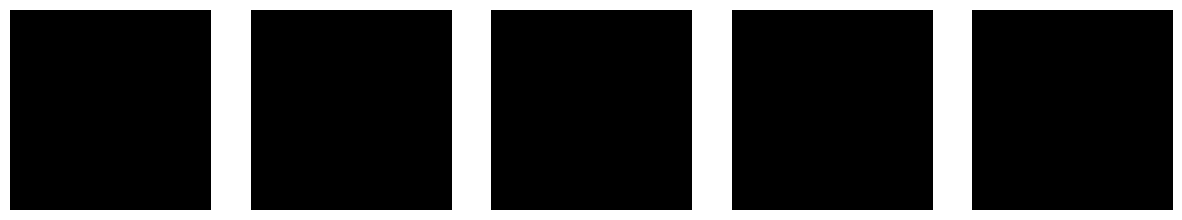

In [ ]:
# Tomar una imagen del conjunto de datos
sample_image = X_train[0].reshape((1, 32, 32, 3))

# Crear un flujo de imágenes augmentadas
it = datagen.flow(sample_image, batch_size=1)

# Generar algunas imágenes augmentadas y mostrarlas
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    # Generar la imagen augmentada
    batch = next(it)  # Cambiar de it.next() a next(it)
    image_aug = batch[0].astype('uint8')
    # Mostrar la imagen
    axes[i].imshow(image_aug)
    axes[i].axis('off')
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Definir el modelo
model = Sequential()

# Añadir capas convolucionales
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Aplanar las características para la capa densa
model.add(Flatten())

# Añadir capas densas
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Regularización para evitar sobreajuste

model.add(Dense(10, activation='softmax'))  # 10 clases para CIFAR-10

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Ver el resumen del modelo
model.summary()

# Entrenar el modelo con augmentación
batch_size = 64
epochs = 25

history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                    validation_data=(X_test, y_test),
                    epochs=epochs)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 50ms/step - accuracy: 0.2725 - loss: 1.9518 - val_accuracy: 0.4684 - val_loss: 1.4638
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 0.4527 - loss: 1.5168 - val_accuracy: 0.5592 - val_loss: 1.2311
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 46ms/step - accuracy: 0.5074 - loss: 1.3736 - val_accuracy: 0.5974 - val_loss: 1.1381
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.5444 - loss: 1.2848 - val_accuracy: 0.6093 - val_loss: 1.1077
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.5775 - loss: 1.2107 - val_accuracy: 0.6399 - val_loss: 1.0146
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 45ms/step - accuracy: 0.5959 - loss: 1.1576 - val_accuracy: 0.6572 - val_loss: 0.9839
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 46ms/step - accuracy: 0.6123 - loss: 1.1076 - val_accuracy: 0.6800 - val_loss: 0.9206
Epoch 8/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 45ms/step - accuracy: 0.6271 - loss: 1.0688 - val_accurac

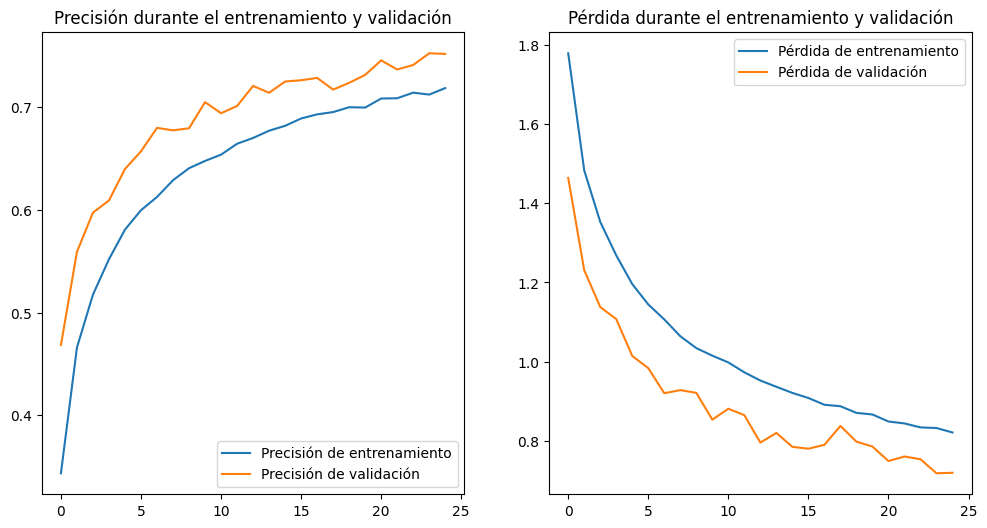

In [ ]:
import matplotlib.pyplot as plt

# Obtener los valores del historial del entrenamiento
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Definir las épocas
epochs_range = range(epochs)

# Graficar la precisión del entrenamiento y la validación
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Precisión de entrenamiento')
plt.plot(epochs_range, val_acc, label='Precisión de validación')
plt.legend(loc='lower right')
plt.title('Precisión durante el entrenamiento y validación')

# Graficar la pérdida del entrenamiento y la validación
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Pérdida de entrenamiento')
plt.plot(epochs_range, val_loss, label='Pérdida de validación')
plt.legend(loc='upper right')
plt.title('Pérdida durante el entrenamiento y validación')

plt.show()


In [ ]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

print(f"Pérdida en el conjunto de prueba: {test_loss}")
print(f"Precisión en el conjunto de prueba: {test_accuracy}")


313/313 - 1s - 5ms/step - accuracy: 0.7521 - loss: 0.7199
Pérdida en el conjunto de prueba: 0.7198833227157593
Precisión en el conjunto de prueba: 0.7520999908447266


In [ ]:
# Hacer predicciones con el modelo entrenado
y_pred = model.predict(X_test)

# Convertir las predicciones one-hot a etiquetas de clase
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Mostrar las primeras predicciones
for i in range(10):
    print(f"Predicción: {y_pred_classes[i]}, Real: {y_true[i]}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicción: 3, Real: 3
Predicción: 8, Real: 8
Predicción: 8, Real: 8
Predicción: 0, Real: 0
Predicción: 6, Real: 6
Predicción: 6, Real: 6
Predicción: 1, Real: 1
Predicción: 6, Real: 6
Predicción: 3, Real: 3
Predicción: 1, Real: 1


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


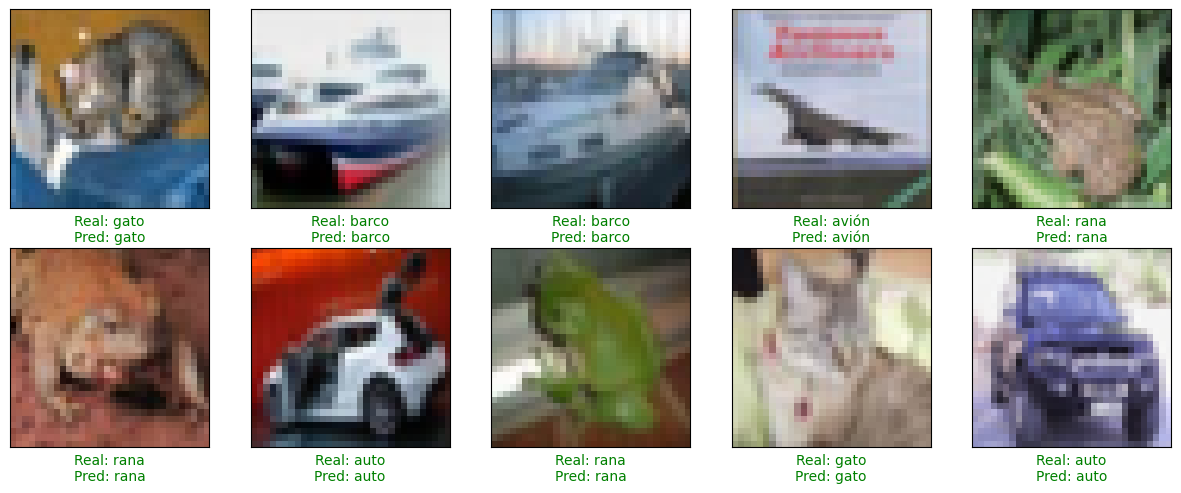

In [ ]:
import numpy as np

# Hacer predicciones con el modelo entrenado
y_pred = model.predict(X_test)

# Convertir las predicciones a etiquetas de clase
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Definir las etiquetas de las clases de CIFAR-10
class_names = ['avión', 'auto', 'pájaro', 'gato', 'ciervo', 'perro', 'rana', 'caballo', 'barco', 'camión']

# Visualizar las primeras 10 imágenes del conjunto de prueba junto con sus predicciones y etiquetas reales
plt.figure(figsize=(15, 15))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])  # Mostrar la imagen

    # Obtener la etiqueta real y la predicha
    real_label = class_names[y_true[i]]
    predicted_label = class_names[y_pred_classes[i]]

    # Mostrar el texto de la etiqueta real y predicha
    color = 'green' if predicted_label == real_label else 'red'
    plt.xlabel(f"Real: {real_label}\nPred: {predicted_label}", color=color)

plt.show()
